In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import OrdinalEncoder
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Gallardo/saberpro_minable.csv", sep=';',encoding='utf8')

In [ ]:
dataframe.head(5)

,estu_genero,inst_nombre_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_nivel_prgm_academico,estu_area_conoc,estu_nucleo_pregrado,estu_grupo_referencia,fami_nivel_sisben,fami_ing_fmliar_mensual,mod_lectura_critica,mod_comunica_escrita_punt,mod_razona_cuantitativo_punt,mod_ingles_punt,mod_comp_ciudadanas_punt,estu_rango_edad,estu_estado_civil_nom,estu_discapacidad,inst_origen_general,inst_acreditada,inst_prgm_acreditado,inst_prgm_metodologia,inst_prgm_municipio,inst_prgm_dpto,inst_prgm_zonageo,area_grupo_referencia,estu_sn_vive_flia,estu_sn_pers_cargo,fami_max_nivel_educa_padres,fami_ocup_padre,fami_ocup_madre,eco_condicion_vivienda,eco_condicion_vive,eco_condicion_electrodomesticos,eco_condicion_tic,estu_sn_trabaja,mod_lectura_critica_desemp,mod_comunica_escrita_desemp,mod_razona_cuantitativo_desemp,mod_ingles_desemp,mod_comp_ciudadanas_desemp,mod_general_punt,mod_general_desemp,cat_estrato
0,F,UNIVERSIDAD SIMON BOLIVAR,NO OFICIAL - CORPORACION,UNIVERSIDAD,INGENIERIA INDUSTRIAL,UNIVERSITARIA,CIENCIAS SOCIALES Y HUMANAS,FORMACION RELACIONADA CON EL CAMPO MILITAR O P...,INGENIERIA,SIN NIVEL,Entre 1 y menos de 2 SM,9.7,9.7,10.3,9.4,9.3,[<23),SOLTERO(A),N,PRIVADO,NO ACREDITADA,NO ACREDITADO,PRESENCIAL,BARRANQUILLA,ATLANTICO,ATLANTICA,CIENCIAS NATURALES Y TÉCNICAS,S,N,PROFESIONAL,EMPLEADO,OBRERO,REGULAR,HACINAMIENTO MEDIO,REGULAR,REGULAR,N,BAJO LA MEDIA,BAJO LA MEDIA,SOBRE LA MEDIA,BAJO LA MEDIA,BAJO LA MEDIA,9.68,BAJO LA MEDIA,BAJO
1,M,UNIVERSIDAD ICESI,NO OFICIAL - CORPORACION,UNIVERSIDAD,ECONOMIA,UNIVERSITARIA,CIENCIAS SOCIALES Y HUMANAS,FORMACION RELACIONADA CON EL CAMPO MILITAR O P...,ECONOMIA,SIN NIVEL,10 -más SM,9.5,10.4,10.9,11.9,11.0,[23-32),SOLTERO(A),N,PRIVADO,NO ACREDITADA,NO ACREDITADO,PRESENCIAL,CALI,VALLE,PACIFICA,CIENCIAS SOCIALES,S,N,PROFESIONAL,EMPRESARIO,EMPRESARIO,BUENA,SIN HACINAMIENTO,BUENA,BUENA,S,BAJO LA MEDIA,SOBRE LA MEDIA,SOBRE LA MEDIA,SOBRE LA MEDIA,SOBRE LA MEDIA,10.74,SOBRE LA MEDIA,ALTO
2,F,ESCUELA SUPERIOR DE ADMINISTRACION PUBLICA-ESAP-,OFICIAL NACIONAL,INSTITUCION UNIVERSITARIA,ADMINISTRACION PUBLICA TERRITORIAL,UNIVERSITARIA,CIENCIAS SOCIALES Y HUMANAS,FORMACION RELACIONADA CON EL CAMPO MILITAR O P...,ADMINISTRACION Y AFINES,NIVEL 2,Entre 2 y menos de 3 SM,10.2,10.7,10.1,9.2,10.0,[23-32),SOLTERO(A),N,OFICIAL,NO ACREDITADA,NO ACREDITADO,A DISTANCIA,PASTO,NARIÑO,PACIFICA,CIENCIAS SOCIALES,S,N,BACHILLER,PENSIONADO,HOGAR,BUENA,SIN HACINAMIENTO,MALA,REGULAR,N,SOBRE LA MEDIA,SOBRE LA MEDIA,SOBRE LA MEDIA,BAJO LA MEDIA,SOBRE LA MEDIA,10.04,SOBRE LA MEDIA,BAJO
3,M,FUNDACION UNIVERSIDAD DE BOGOTA - JORGE TADEO ...,NO OFICIAL - FUNDACION,UNIVERSIDAD,PUBLICIDAD,UNIVERSITARIA,CIENCIAS SOCIALES Y HUMANAS,FORMACION RELACIONADA CON EL CAMPO MILITAR O P...,"COMUNICACION, PERIODISMO Y PUBLICIDAD",SIN NIVEL,Entre 7 y menos de 10 SM,11.5,9.9,9.9,13.3,11.1,[32-41),CASADO(A),N,PRIVADO,ACREDITADA,NO ACREDITADO,PRESENCIAL,BOGOTA D.C.,BOGOTA,BOGOTA,CIENCIAS SOCIALES,S,N,POSTGRADO,PENSIONADO,PENSIONADO,BUENA,SIN HACINAMIENTO,BUENA,BUENA,S,SOBRE LA MEDIA,BAJO LA MEDIA,BAJO LA MEDIA,SOBRE LA MEDIA,SOBRE LA MEDIA,11.14,SOBRE LA MEDIA,MEDIO
4,M,UNIVERSIDAD ICESI,NO OFICIAL - CORPORACION,UNIVERSIDAD,INGENIERIA TELEMATICA,UNIVERSITARIA,"INGENIERIA, ARQUITECTURA, URBANISMO Y AFINES","INGENIERIA AGROINDUSTRIAL, ALIMENTOS Y AFINES",INGENIERIA,SIN NIVEL,Entre 7 y menos de 10 SM,12.7,10.6,12.7,14.4,12.3,[<23),SOLTERO(A),N,PRIVADO,NO ACREDITADA,ACREDITADO,PRESENCIAL,CALI,VALLE,PACIFICA,CIENCIAS NATURALES Y TÉCNICAS,S,N,POSTGRADO,EMPLEADO,HOGAR,BUENA,SIN HACINAMIENTO,BUENA,BUENA,S,SOBRE LA MEDIA,SOBRE LA MEDIA,SOBRE LA MEDIA,SOBRE LA MEDIA,SOBRE LA MEDIA,12.54,SOBRE LA MEDIA,BAJO


In [ ]:
dataframe.estu_genero.value_counts()

F           410712
M           307491
SIN DATO      2653
Name: estu_genero, dtype: int64

In [ ]:
dummies = pd.get_dummies(dataframe['estu_genero'], drop_first = True, dtype=float, prefix='estu_genero_encoded')
dummies.head()

,estu_genero_encoded_M,estu_genero_encoded_SIN DATO
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0


In [ ]:
# Añadimos las variables binarias al DataFrame
dataframe = pd.concat([dataframe, dummies], axis = 1)

# Eliminamos la vairable original race
dataframe = dataframe.drop(columns=['estu_genero'])
dataframe = dataframe.drop(columns=['estu_genero_encoded_SIN DATO'])

In [ ]:
var1 = pd.get_dummies(dataframe['mod_lectura_critica_desemp'], drop_first = True, dtype=float, prefix='mod_lectura_critica_desemp_encoded')
dataframe = pd.concat([dataframe, var1], axis = 1)

# Eliminamos la vairable original race
dataframe = dataframe.drop(columns=['mod_lectura_critica_desemp'])

In [ ]:
var2 = pd.get_dummies(dataframe['mod_comunica_escrita_desemp'], drop_first = True, dtype=float, prefix='mod_comunica_escrita_desemp_encoded')
dataframe = pd.concat([dataframe, var2], axis = 1)

# Eliminamos la vairable original race
dataframe = dataframe.drop(columns=['mod_comunica_escrita_desemp'])

In [ ]:
var3 = pd.get_dummies(dataframe['mod_razona_cuantitativo_desemp'], drop_first = True, dtype=float, prefix='mod_razona_cuantitativo_desemp_encoded')
dataframe = pd.concat([dataframe, var3], axis = 1)

# Eliminamos la vairable original race
dataframe = dataframe.drop(columns=['mod_razona_cuantitativo_desemp'])

In [ ]:
var4 = pd.get_dummies(dataframe['mod_ingles_desemp'], drop_first = True, dtype=float, prefix='mod_ingles_desemp_encoded')
dataframe = pd.concat([dataframe, var4], axis = 1)

# Eliminamos la vairable original race
dataframe = dataframe.drop(columns=['mod_ingles_desemp'])

In [ ]:
var5 = pd.get_dummies(dataframe['mod_comp_ciudadanas_desemp'], drop_first = True, dtype=float, prefix='mod_comp_ciudadanas_desemp_encoded')
dataframe = pd.concat([dataframe, var5], axis = 1)

# Eliminamos la vairable original race
dataframe = dataframe.drop(columns=['mod_comp_ciudadanas_desemp'])

In [ ]:
var6 = pd.get_dummies(dataframe['mod_general_desemp'], drop_first = True, dtype=float, prefix='mod_general_desemp_encoded')
dataframe = pd.concat([dataframe, var6], axis = 1)

# Eliminamos la vairable original race
dataframe = dataframe.drop(columns=['mod_general_desemp'])

In [ ]:
#dataframe.dtypes

In [ ]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["UNIVERSIDAD", "INSTITUCION UNIVERSITARIA", "TECNICA PROFESIONAL", "INSTITUCION TECNOLOGICA", "NORMALISTA", "ESCUELA TECNOLOGICA"]])
# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(dataframe[["inst_caracter_academico"]])
dataframe["inst_caracter_academico-encoded"] = encoder.transform(dataframe[["inst_caracter_academico"]])
dataframe = dataframe.drop(columns=['inst_caracter_academico'])


encoder = OrdinalEncoder(categories=[["UNIVERSITARIA", "TECNOLOGICA TERMINAL", "TECNICA PROFESIONAL", "NORMALISTA"]])
encoder.fit(dataframe[["estu_nivel_prgm_academico"]])
dataframe["estu_nivel_prgm_academico-encoded"] = encoder.transform(dataframe[["estu_nivel_prgm_academico"]])
dataframe = dataframe.drop(columns=['estu_nivel_prgm_academico'])


encoder = OrdinalEncoder(categories=[["CIENCIAS SOCIALES Y HUMANAS", "ECONOMIA, ADMINISTRACION, CONTADURIA Y AFINES", "INGENIERIA, ARQUITECTURA, URBANISMO Y AFINES", "CIENCIAS DE LA EDUCACION","CIENCIAS DE LA SALUD", "BELLAS ARTES", "SIN CLASIFICAR", "MATEMATICAS Y CIENCIAS NATURALES", "AGRONOMIA VETERINARIA Y AFINES"]])
encoder.fit(dataframe[["estu_area_conoc"]])
dataframe["estu_area_conoc-encoded"] = encoder.transform(dataframe[["estu_area_conoc"]])
dataframe = dataframe.drop(columns=['estu_area_conoc'])

encoder = OrdinalEncoder(categories=[["SIN NIVEL","NIVEL 1","NIVEL 2","NIVEL 3", "OTRO NIVEL"]])
encoder.fit(dataframe[["fami_nivel_sisben"]])
dataframe["fami_nivel_sisben-encoded"] = encoder.transform(dataframe[["fami_nivel_sisben"]])
dataframe = dataframe.drop(columns=['fami_nivel_sisben'])


encoder = OrdinalEncoder(categories=[["[23-32)", "[<23)", "[32-41)", "[41-50)","[>=50]"]])
encoder.fit(dataframe[["estu_rango_edad"]])
dataframe["estu_rango_edad-encoded"] = encoder.transform(dataframe[["estu_rango_edad"]])
dataframe = dataframe.drop(columns=['estu_rango_edad'])


encoder = OrdinalEncoder(categories=[["SOLTERO(A)", "CASADO(A)", "UNION LIBRE", "SEPARADO(A)/DIVORCIADO(A)", "VIUDO(A)" ]])
encoder.fit(dataframe[["estu_estado_civil_nom"]])
dataframe["estu_estado_civil_nom-encoded"] = encoder.transform(dataframe[["estu_estado_civil_nom"]])
dataframe = dataframe.drop(columns=['estu_estado_civil_nom'])


encoder = OrdinalEncoder(categories=[["N", "M", "I", "S", "R", "C" ]])
encoder.fit(dataframe[["estu_discapacidad"]])
dataframe["estu_discapacidad-encoded"] = encoder.transform(dataframe[["estu_discapacidad"]])
dataframe = dataframe.drop(columns=['estu_discapacidad'])


encoder = OrdinalEncoder(categories=[["PRIVADO", "OFICIAL", "REGIMEN ESPECIAL" ]])
encoder.fit(dataframe[["inst_origen_general"]])
dataframe["inst_origen_general-encoded"] = encoder.transform(dataframe[["inst_origen_general"]])
dataframe = dataframe.drop(columns=['inst_origen_general'])

encoder = OrdinalEncoder(categories=[["NO ACREDITADA","ACREDITADA" ]])
encoder.fit(dataframe[["inst_acreditada"]])
dataframe["inst_acreditada-encoded"] = encoder.transform(dataframe[["inst_acreditada"]])
dataframe = dataframe.drop(columns=['inst_acreditada'])


encoder = OrdinalEncoder(categories=[["NO ACREDITADO","ACREDITADO" ]])
encoder.fit(dataframe[["inst_prgm_acreditado"]])
dataframe["inst_prgm_acreditado-encoded"] = encoder.transform(dataframe[["inst_prgm_acreditado"]])
dataframe = dataframe.drop(columns=['inst_prgm_acreditado'])


encoder = OrdinalEncoder(categories=[["PRESENCIAL","A DISTANCIA" ]])
encoder.fit(dataframe[["inst_prgm_metodologia"]])
dataframe["inst_prgm_metodologia-encoded"] = encoder.transform(dataframe[["inst_prgm_metodologia"]])
dataframe = dataframe.drop(columns=['inst_prgm_metodologia'])


encoder = OrdinalEncoder(categories=[["BOGOTA", "ATLANTICA", "ORIENTAL", "ANTIOQUIA", "PACIFICA", "CENTRAL", "ORINOQUIA" ]])
encoder.fit(dataframe[["inst_prgm_zonageo"]])
dataframe["inst_prgm_zonageo-encoded"] = encoder.transform(dataframe[["inst_prgm_zonageo"]])
dataframe = dataframe.drop(columns=['inst_prgm_zonageo'])


encoder = OrdinalEncoder(categories=[["CIENCIAS SOCIALES", "CIENCIAS HUMANAS", "CIENCIAS NATURALES Y TÉCNICAS", "CIENCIAS DE LA SALUD" ]])
encoder.fit(dataframe[["area_grupo_referencia"]])
dataframe["area_grupo_referencia-encoded"] = encoder.transform(dataframe[["area_grupo_referencia"]])
dataframe = dataframe.drop(columns=['area_grupo_referencia'])


encoder = OrdinalEncoder(categories=[["S", "N"]])
encoder.fit(dataframe[["estu_sn_vive_flia"]])
dataframe["estu_sn_vive_flia-encoded"] = encoder.transform(dataframe[["estu_sn_vive_flia"]])
dataframe = dataframe.drop(columns=['estu_sn_vive_flia'])


encoder = OrdinalEncoder(categories=[["BACHILLER", "PRIMARIA", "PROFESIONAL", "NINGUNO", "TÉCNIC0/TECNÓLOGO", "POSTGRADO", "NO SABE"]])
encoder.fit(dataframe[["fami_max_nivel_educa_padres"]])
dataframe["fami_max_nivel_educa_padres-encoded"] = encoder.transform(dataframe[["fami_max_nivel_educa_padres"]])
dataframe = dataframe.drop(columns=['fami_max_nivel_educa_padres'])


encoder = OrdinalEncoder(categories=[["INDEPENDIENTE", "EMPLEADO", "EMPRESARIO", "PENSIONADO", "OBRERO", "OTRA", "PROFESIONAL", "HOGAR", "NO SABE"]])
encoder.fit(dataframe[["fami_ocup_padre"]])
dataframe["fami_ocup_padre-encoded"] = encoder.transform(dataframe[["fami_ocup_padre"]])
dataframe = dataframe.drop(columns=['fami_ocup_padre'])


encoder = OrdinalEncoder(categories=[["HOGAR", "EMPLEADO", "INDEPENDIENTE", "OBRERO",  "EMPRESARIO",  "PENSIONADO", "OTRA", "PROFESIONAL", "NO SABE"]])
encoder.fit(dataframe[["fami_ocup_madre"]])
dataframe["fami_ocup_madre-encoded"] = encoder.transform(dataframe[["fami_ocup_madre"]])
dataframe = dataframe.drop(columns=['fami_ocup_madre'])


encoder = OrdinalEncoder(categories=[["BUENA", "REGULAR", "MALA"]])
encoder.fit(dataframe[["eco_condicion_vivienda"]])
dataframe["eco_condicion_vivienda-encoded"] = encoder.transform(dataframe[["eco_condicion_vivienda"]])
dataframe = dataframe.drop(columns=['eco_condicion_vivienda'])


encoder = OrdinalEncoder(categories=[["SIN HACINAMIENTO", "HACINAMIENTO MEDIO", "HACINAMIENTO CRITICO"]])
encoder.fit(dataframe[["eco_condicion_vive"]])
dataframe["eco_condicion_vive-encoded"] = encoder.transform(dataframe[["eco_condicion_vive"]])
dataframe = dataframe.drop(columns=['eco_condicion_vive'])


encoder = OrdinalEncoder(categories=[["BUENA", "REGULAR", "MALA"]])
encoder.fit(dataframe[["eco_condicion_electrodomesticos"]])
dataframe["eco_condicion_electrodomesticos-encoded"] = encoder.transform(dataframe[["eco_condicion_electrodomesticos"]])
dataframe = dataframe.drop(columns=['eco_condicion_electrodomesticos'])


encoder = OrdinalEncoder(categories=[["BUENA", "REGULAR", "MALA"]])
encoder.fit(dataframe[["eco_condicion_tic"]])
dataframe["eco_condicion_tic-encoded"] = encoder.transform(dataframe[["eco_condicion_tic"]])
dataframe = dataframe.drop(columns=['eco_condicion_tic'])


encoder = OrdinalEncoder(categories=[["S", "N"]])
encoder.fit(dataframe[["estu_sn_trabaja"]])
dataframe["estu_sn_trabaja-encoded"] = encoder.transform(dataframe[["estu_sn_trabaja"]])
dataframe = dataframe.drop(columns=['estu_sn_trabaja'])


encoder = OrdinalEncoder(categories=[["MEDIO", "BAJO",  "ALTO", "RURAL"]])
encoder.fit(dataframe[["cat_estrato"]])
dataframe["cat_estrato-encoded"] = encoder.transform(dataframe[["cat_estrato"]])
dataframe = dataframe.drop(columns=['cat_estrato'])
#--------------------------
encoder = OrdinalEncoder(categories=[['NO OFICIAL - CORPORACION','NO OFICIAL - FUNDACION','OFICIAL DEPARTAMENTAL','OFICIAL NACIONAL', 'OFICIAL MUNICIPAL','OFICIAL','REGIMEN ESPECIAL','NO OFICIAL']])
encoder.fit(dataframe[["inst_origen"]])
dataframe["inst_origen_encoded"] = encoder.transform(dataframe[["inst_origen"]])
dataframe = dataframe.drop(columns=['inst_origen'])

encoder = OrdinalEncoder(categories=[['FORMACION RELACIONADA CON EL CAMPO MILITAR O POLICIAL','ADMINISTRACION','CONTADURIA PUBLICA', 'EDUCACION','DERECHO Y AFINES','INGENIERIA DE SISTEMAS, TELEMATICA Y AFINES','INGENIERIA INDUSTRIAL Y AFINES','ECONOMIA','PSICOLOGIA', 'MEDICINA', 'INGENIERIA ELECTRONICA, TELECOMUNICACIONES Y AFINES','SIN ESPECIFICAR', 'DISENIO', 'INGENIERIA CIVIL Y AFINES', 'COMUNICACION SOCIAL, PERIODISMO Y AFINES','ENFERMERIA','INGENIERIA MECANICA Y AFINES','SOCIOLOGIA, TRABAJO SOCIAL Y AFINES','INGENIERIA AMBIENTAL, SANITARIA Y AFINES', 'ARQUITECTURA','SALUD PUBLICA','TERAPIAS','ODONTOLOGIA','PUBLICIDAD Y AFINES','BIOLOGIA, MICROBIOLOGIA Y AFINES','INGENIERIA ELECTRICA Y AFINES', 'MEDICINA VETERINARIA','INGENIERIA AGROINDUSTRIAL, ALIMENTOS Y AFINES','INGENIERIA ADMNISTRATIVA Y AFINES','CIENCIA POLITICA, RELACIONES INTERNACIONALES','INGENIERIA QUIMICA Y AFINES', 'ATES PLASTICAS, VISUALES Y AFINES','INGENIERIA DE MINAS, METALURGIA Y AFINES','QUIMICA Y AFINES','ZOOTECNIA', 'BACTERIOLOGIA','AGRONOMIA','INGENIERIA AGRONOMICA, PECUARIA Y AFINES','INGENIERIA AGRICOLA, FORESTAL Y AFINES','OTRAS INGENIERIAS','FILOSOFIA, TEOLOGIA Y AFINES','LENGUAS MODERNAS, LITERATURA, LINGUISTICA Y AFINES','GEOGRAFIA, HISTORIA','OPTOMETRIA, OTROS PROGRAMAS DE CIENCIAS DE LA SALUD','MUSICA','INSTRUMENTACION QUIRURGICA','DEPORTES, EDUCACION FISICA Y RECREACION','MATEMATICAS, ESTADISTICA Y AFINES','INGENIERIA BIOMEDICA Y AFINES','NUTRICION Y DIETETICA','ANTROPOLOGIA, ARTES LIBERALES','BIBLIOTECOLOGIA, OTROS DE CIENCIAS SOCIALES Y HUMANAS','GEOLOGIA, OTROS PROGRAMAS DE CIENCIAS NATURALES','ARTES REPRESENTATIVAS','FISICA','OTROS PROGRAMAS ASOCIADOS A BELLAS ARTES', 'SIN CLASIFICAR'   ]])
encoder.fit(dataframe[["estu_nucleo_pregrado"]])
dataframe["estu_nucleo_pregrado_encoded"] = encoder.transform(dataframe[["estu_nucleo_pregrado"]])
dataframe = dataframe.drop(columns=['estu_nucleo_pregrado'])

encoder = OrdinalEncoder(categories=[['ADMINISTRACION Y AFINES','INGENIERIA','EDUCACION','CONTADURIA', 'DERECHO','SALUD','PSICOLOGIA','COMUNICACION, PERIODISMO Y PUBLICIDAD','BELLAS ARTES Y DISEÑO','MEDICINA','CIENCIAS SOCIALES', 'ENFERMERIA','ECONOMIA','INGENIERIA, INDUSTRIA Y MINAS','NORMALES SUPERIORES', 'MILITAR Y POLICIAL','CIENCIAS AGROPECUARIAS','ARQUITECTURA Y URBANISMO','CIENCIAS NATURALES Y EXACTAS','TIC','ARTES - DISEÑO - COMUNICACION','HUMANIDADES','CIENCIAS MILITARES Y NAVALES','RECREACION Y DEPORTES','JUDICIAL', 'GRUPO REFERENCIA NACIONAL']])
encoder.fit(dataframe[["estu_grupo_referencia"]])
dataframe["estu_grupo_referencia_encoded"] = encoder.transform(dataframe[["estu_grupo_referencia"]])
dataframe = dataframe.drop(columns=['estu_grupo_referencia'])

encoder = OrdinalEncoder(categories=[['Entre 1 y menos de 2 SM','Entre 2 y menos de 3 SM','Entre 3 y menos de 5 SM', 'Menos de 1 SM','Entre 5 y menos de 7 SM','Entre 7 y menos de 10 SM','10 -más SM' ]])
encoder.fit(dataframe[["fami_ing_fmliar_mensual"]])
dataframe["fami_ing_fmliar_mensuala_encoded"] = encoder.transform(dataframe[["fami_ing_fmliar_mensual"]])
dataframe = dataframe.drop(columns=['fami_ing_fmliar_mensual'])

encoder = OrdinalEncoder(categories=[['N','S' ]])
encoder.fit(dataframe[["estu_sn_pers_cargo"]])
dataframe["estu_sn_pers_cargo_encoded"] = encoder.transform(dataframe[["estu_sn_pers_cargo"]])
dataframe = dataframe.drop(columns=['estu_sn_pers_cargo'])

In [ ]:
#dataframe.mod_lectura_critica_desemp.value_counts()

In [ ]:
dataframe = dataframe.drop(columns=['inst_nombre_institucion', 'estu_prgm_academico','inst_prgm_municipio', 'inst_prgm_dpto'])

In [ ]:
dataframe.dtypes

mod_lectura_critica                                      float64
mod_comunica_escrita_punt                                float64
mod_razona_cuantitativo_punt                             float64
mod_ingles_punt                                          float64
mod_comp_ciudadanas_punt                                 float64
mod_general_punt                                         float64
estu_genero_encoded_M                                    float64
mod_lectura_critica_desemp_encoded_SOBRE LA MEDIA        float64
mod_comunica_escrita_desemp_encoded_SOBRE LA MEDIA       float64
mod_razona_cuantitativo_desemp_encoded_SOBRE LA MEDIA    float64
mod_ingles_desemp_encoded_SOBRE LA MEDIA                 float64
mod_comp_ciudadanas_desemp_encoded_SOBRE LA MEDIA        float64
mod_general_desemp_encoded_SOBRE LA MEDIA                float64
inst_caracter_academico-encoded                          float64
estu_nivel_prgm_academico-encoded                        float64
estu_area_conoc-encoded  

In [ ]:
dataframe.head(10)

,mod_lectura_critica,mod_comunica_escrita_punt,mod_razona_cuantitativo_punt,mod_ingles_punt,mod_comp_ciudadanas_punt,mod_general_punt,estu_genero_encoded_M,mod_lectura_critica_desemp_encoded_SOBRE LA MEDIA,mod_comunica_escrita_desemp_encoded_SOBRE LA MEDIA,mod_razona_cuantitativo_desemp_encoded_SOBRE LA MEDIA,mod_ingles_desemp_encoded_SOBRE LA MEDIA,mod_comp_ciudadanas_desemp_encoded_SOBRE LA MEDIA,mod_general_desemp_encoded_SOBRE LA MEDIA,inst_caracter_academico-encoded,estu_nivel_prgm_academico-encoded,estu_area_conoc-encoded,fami_nivel_sisben-encoded,estu_rango_edad-encoded,estu_estado_civil_nom-encoded,estu_discapacidad-encoded,inst_origen_general-encoded,inst_acreditada-encoded,inst_prgm_acreditado-encoded,inst_prgm_metodologia-encoded,inst_prgm_zonageo-encoded,area_grupo_referencia-encoded,estu_sn_vive_flia-encoded,fami_max_nivel_educa_padres-encoded,fami_ocup_padre-encoded,fami_ocup_madre-encoded,eco_condicion_vivienda-encoded,eco_condicion_vive-encoded,eco_condicion_electrodomesticos-encoded,eco_condicion_tic-encoded,estu_sn_trabaja-encoded,cat_estrato-encoded,inst_origen_encoded,estu_nucleo_pregrado_encoded,estu_grupo_referencia_encoded,fami_ing_fmliar_mensuala_encoded,estu_sn_pers_cargo_encoded
0,9.7,9.7,10.3,9.4,9.3,9.68,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,9.5,10.4,10.9,11.9,11.0,10.74,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,12.0,6.0,0.0
2,10.2,10.7,10.1,9.2,10.0,10.04,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0
3,11.5,9.9,9.9,13.3,11.1,11.14,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,5.0,0.0
4,12.7,10.6,12.7,14.4,12.3,12.54,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,1.0,5.0,0.0
5,9.3,11.1,9.7,9.9,10.4,10.08,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,2.0,0.0
6,11.8,11.4,9.9,10.1,10.9,10.82,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,5.0,0.0,0.0
7,9.9,9.3,8.7,9.7,9.1,9.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,8.0,6.0,1.0,0.0
8,10.5,9.0,10.1,9.6,9.9,9.82,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,23.0,20.0,3.0,0.0
9,11.7,10.6,12.0,13.3,11.0,11.72,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0


In [ ]:
dataframe.rename(columns={'estu_genero_encoded_M':'estu_genero',
'mod_lectura_critica_desemp_encoded_SOBRE LA MEDIA':'mod_lectura_critica_desemp',
'mod_comunica_escrita_desemp_encoded_SOBRE LA MEDIA' : 'mod_comunica_escrita_desemp',       
'mod_razona_cuantitativo_desemp_encoded_SOBRE LA MEDIA' : 'mod_razona_cuantitativo_desemp', 
'mod_ingles_desemp_encoded_SOBRE LA MEDIA' :  'mod_ingles_desemp' ,             
'mod_comp_ciudadanas_desemp_encoded_SOBRE LA MEDIA' : 'mod_comp_ciudadanas_desemp' ,      
'mod_general_desemp_encoded_SOBRE LA MEDIA' : 'mod_general_desemp' ,          
'inst_caracter_academico-encoded': 'inst_caracter_academico' ,                       
'estu_nivel_prgm_academico-encoded' : 'estu_nivel_prgm_academico'  ,                 
'estu_area_conoc-encoded' :    'estu_area_conoc'  ,                          
'fami_nivel_sisben-encoded' :  'fami_nivel_sisben',                                                      
'estu_rango_edad-encoded' :  'estu_rango_edad' ,                               
'estu_estado_civil_nom-encoded' :  'estu_estado_civil_nom' ,                      
'estu_discapacidad-encoded' : 'estu_discapacidad' ,                             
'inst_origen_general-encoded ' : 'inst_origen_general'  ,                    
'inst_acreditada-encoded' : 'inst_acreditada' ,                            
'inst_prgm_acreditado-encoded': 'inst_prgm_acreditado' ,                           
'inst_prgm_metodologia-encoded' : 'inst_prgm_metodologia' ,                    
'inst_prgm_zonageo-encoded'   :  'inst_prgm_zonageo'  ,                       
'area_grupo_referencia-encoded': 'area_grupo_referencia',                         
'estu_sn_vive_flia-encoded': 'estu_sn_vive_flia'  ,                             
'fami_max_nivel_educa_padres-encoded'  : 'fami_max_nivel_educa_padres' ,                  
'fami_ocup_padre-encoded' : 'fami_ocup_padre'    ,                                                            
'fami_ocup_madre-encoded' : 'fami_ocup_madre'     ,                          
'eco_condicion_vivienda-encoded' : 'eco_condicion_vivienda' ,                       
'eco_condicion_vive-encoded' : 'eco_condicion_vive',                            
'eco_condicion_electrodomesticos-encoded':'eco_condicion_electrodomesticos',                  
'eco_condicion_tic-encoded':'eco_condicion_tic' ,                         
'estu_sn_trabaja-encoded' : 'estu_sn_trabaja'  ,                             
'cat_estrato-encoded'  :  'cat_estrato' ,                                
'inst_origen_encoded' :  'inst_origen'  ,                                
'estu_nucleo_pregrado_encoded' : 'estu_nucleo_pregrado'  ,                         
'estu_grupo_referencia_encoded':'estu_grupo_referencia'  ,                      
'fami_ing_fmliar_mensuala_encoded'  : 'fami_ing_fmliar_mensuala',                    
'estu_sn_pers_cargo_encoded': 'estu_sn_pers_cargo'})

,mod_lectura_critica,mod_comunica_escrita_punt,mod_razona_cuantitativo_punt,mod_ingles_punt,mod_comp_ciudadanas_punt,mod_general_punt,estu_genero,mod_lectura_critica_desemp,mod_comunica_escrita_desemp,mod_razona_cuantitativo_desemp,mod_ingles_desemp,mod_comp_ciudadanas_desemp,mod_general_desemp,inst_caracter_academico,estu_nivel_prgm_academico,estu_area_conoc,fami_nivel_sisben,estu_rango_edad,estu_estado_civil_nom,estu_discapacidad,inst_origen_general-encoded,inst_acreditada,inst_prgm_acreditado,inst_prgm_metodologia,inst_prgm_zonageo,area_grupo_referencia,estu_sn_vive_flia,fami_max_nivel_educa_padres,fami_ocup_padre,fami_ocup_madre,eco_condicion_vivienda,eco_condicion_vive,eco_condicion_electrodomesticos,eco_condicion_tic,estu_sn_trabaja,cat_estrato,inst_origen,estu_nucleo_pregrado,estu_grupo_referencia,fami_ing_fmliar_mensuala,estu_sn_pers_cargo
0,9.7,9.7,10.3,9.4,9.3,9.68,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,9.5,10.4,10.9,11.9,11.0,10.74,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,12.0,6.0,0.0
2,10.2,10.7,10.1,9.2,10.0,10.04,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0
3,11.5,9.9,9.9,13.3,11.1,11.14,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,5.0,0.0
4,12.7,10.6,12.7,14.4,12.3,12.54,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720851,9.7,10.3,8.7,9.5,9.6,9.56,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,19.0,1.0,0.0
720852,7.9,10.1,9.5,9.5,9.1,9.22,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0,1.0,0.0,3.0,5.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,2.0,3.0,1.0
720853,10.1,8.4,9.7,9.9,9.0,9.42,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
720854,9.6,9.9,9.9,9.2,9.3,9.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
dataframe.to_csv('/content/drive/MyDrive/Colab Notebooks/Gallardo/saberpro_minableNumerico.csv', sep=';')

In [ ]:
dataframe2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Gallardo/saberpro_minableNumerico.csv", sep=';')

In [ ]:
dataframe2.head(10)

,Unnamed: 0,mod_lectura_critica,mod_comunica_escrita_punt,mod_razona_cuantitativo_punt,mod_ingles_punt,mod_comp_ciudadanas_punt,mod_general_punt,estu_genero_encoded_M,mod_lectura_critica_desemp_encoded_SOBRE LA MEDIA,mod_comunica_escrita_desemp_encoded_SOBRE LA MEDIA,mod_razona_cuantitativo_desemp_encoded_SOBRE LA MEDIA,mod_ingles_desemp_encoded_SOBRE LA MEDIA,mod_comp_ciudadanas_desemp_encoded_SOBRE LA MEDIA,mod_general_desemp_encoded_SOBRE LA MEDIA,inst_caracter_academico-encoded,estu_nivel_prgm_academico-encoded,estu_area_conoc-encoded,fami_nivel_sisben-encoded,estu_rango_edad-encoded,estu_estado_civil_nom-encoded,estu_discapacidad-encoded,inst_origen_general-encoded,inst_acreditada-encoded,inst_prgm_acreditado-encoded,inst_prgm_metodologia-encoded,inst_prgm_zonageo-encoded,area_grupo_referencia-encoded,estu_sn_vive_flia-encoded,fami_max_nivel_educa_padres-encoded,fami_ocup_padre-encoded,fami_ocup_madre-encoded,eco_condicion_vivienda-encoded,eco_condicion_vive-encoded,eco_condicion_electrodomesticos-encoded,eco_condicion_tic-encoded,estu_sn_trabaja-encoded,cat_estrato-encoded,inst_origen_encoded,estu_nucleo_pregrado_encoded,estu_grupo_referencia_encoded,fami_ing_fmliar_mensuala_encoded,estu_sn_pers_cargo_encoded
0,0,9.7,9.7,10.3,9.4,9.3,9.68,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,9.5,10.4,10.9,11.9,11.0,10.74,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,12.0,6.0,0.0
2,2,10.2,10.7,10.1,9.2,10.0,10.04,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0
3,3,11.5,9.9,9.9,13.3,11.1,11.14,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,5.0,0.0
4,4,12.7,10.6,12.7,14.4,12.3,12.54,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,1.0,5.0,0.0
5,5,9.3,11.1,9.7,9.9,10.4,10.08,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,2.0,0.0
6,6,11.8,11.4,9.9,10.1,10.9,10.82,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,5.0,0.0,0.0
7,7,9.9,9.3,8.7,9.7,9.1,9.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,8.0,6.0,1.0,0.0
8,8,10.5,9.0,10.1,9.6,9.9,9.82,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,23.0,20.0,3.0,0.0
9,9,11.7,10.6,12.0,13.3,11.0,11.72,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0


In [ ]:
cols=np.array(dataframe2.columns)
cols

array(['Unnamed: 0', 'mod_lectura_critica', 'mod_comunica_escrita_punt',
       'mod_razona_cuantitativo_punt', 'mod_ingles_punt',
       'mod_comp_ciudadanas_punt', 'mod_general_punt',
       'estu_genero_encoded_M',
       'mod_lectura_critica_desemp_encoded_SOBRE LA MEDIA',
       'mod_comunica_escrita_desemp_encoded_SOBRE LA MEDIA',
       'mod_razona_cuantitativo_desemp_encoded_SOBRE LA MEDIA',
       'mod_ingles_desemp_encoded_SOBRE LA MEDIA',
       'mod_comp_ciudadanas_desemp_encoded_SOBRE LA MEDIA',
       'mod_general_desemp_encoded_SOBRE LA MEDIA',
       'inst_caracter_academico-encoded',
       'estu_nivel_prgm_academico-encoded', 'estu_area_conoc-encoded',
       'fami_nivel_sisben-encoded', 'estu_rango_edad-encoded',
       'estu_estado_civil_nom-encoded', 'estu_discapacidad-encoded',
       'inst_origen_general-encoded', 'inst_acreditada-encoded',
       'inst_prgm_acreditado-encoded', 'inst_prgm_metodologia-encoded',
       'inst_prgm_zonageo-encoded', 'area_grupo_refe

In [ ]:
#target o variable objetivo
y=dataframe2['mod_general_desemp_encoded_SOBRE LA MEDIA']
#Caracteristicas y=f(X)
X=dataframe2[['inst_caracter_academico-encoded',
       'estu_nivel_prgm_academico-encoded', 'estu_area_conoc-encoded',
       'fami_nivel_sisben-encoded', 'estu_rango_edad-encoded',
       'estu_estado_civil_nom-encoded', 'estu_discapacidad-encoded',
       'inst_origen_general-encoded', 'inst_acreditada-encoded',
       'inst_prgm_acreditado-encoded', 'inst_prgm_metodologia-encoded',
       'inst_prgm_zonageo-encoded', 'area_grupo_referencia-encoded',
       'estu_sn_vive_flia-encoded', 'fami_max_nivel_educa_padres-encoded',
       'fami_ocup_padre-encoded', 'fami_ocup_madre-encoded',
       'eco_condicion_vivienda-encoded', 'eco_condicion_vive-encoded',
       'eco_condicion_electrodomesticos-encoded',
       'eco_condicion_tic-encoded', 'estu_sn_trabaja-encoded',
       'cat_estrato-encoded', 'inst_origen_encoded',
       'estu_nucleo_pregrado_encoded', 'estu_grupo_referencia_encoded',
       'fami_ing_fmliar_mensuala_encoded', 'estu_sn_pers_cargo_encoded']]

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
X.shape, X.shape[0]*0.2

((720856, 28), 144171.2)

#Sintonización de hiperparámetros

<img src='https://miro.medium.com/max/1004/0*yDmmJmvRowl0cSN8.png' />

#Partición de datos en entrenamiento y prueba

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Minería de datos, busqueda de patrones utilizando ML para clasificación binaria

In [ ]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth': np.linspace(3,100,1),'max_features':('auto', 'sqrt', 'log2')}
tree=DecisionTreeClassifier()
clf = RandomizedSearchCV(tree, parameters)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3.0, 'max_features': 'auto'}

In [ ]:
tree_best=DecisionTreeClassifier(criterion='entropy',max_depth=3.0, max_features='auto', random_state=42)
tree_best.fit(X_train,y_train)
exactitud_test=tree_best.score(X_test,y_test)
exactitud_train=tree_best.score(X_train,y_train)
print('exactitud datos entrenamiento:',exactitud_test,'exactitud datos de prueba',exactitud_train)

exactitud datos entrenamiento: 0.645076713925034 exactitud datos de prueba 0.6459863634156661


In [ ]:
from sklearn.metrics import classification_report 

print('Test metrics')
y_pred_test=tree_best.predict(X_test)
print(classification_report(y_test, y_pred_test))
print('Train metrics')
y_pred_train=tree_best.predict(X_train)
print(classification_report(y_train, y_pred_train))

Test metrics
              precision    recall  f1-score   support

         0.0       0.62      0.87      0.72     76307
         1.0       0.73      0.40      0.51     67865

    accuracy                           0.65    144172
   macro avg       0.67      0.63      0.62    144172
weighted avg       0.67      0.65      0.62    144172

Train metrics
              precision    recall  f1-score   support

         0.0       0.62      0.87      0.72    303802
         1.0       0.73      0.40      0.52    272882

    accuracy                           0.65    576684
   macro avg       0.67      0.63      0.62    576684
weighted avg       0.67      0.65      0.62    576684



Sin normalizar con datos de prueba


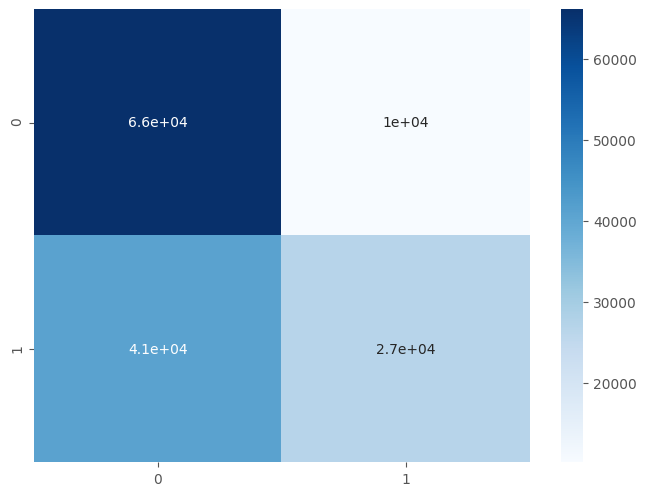

Normalizada con datos de prueba


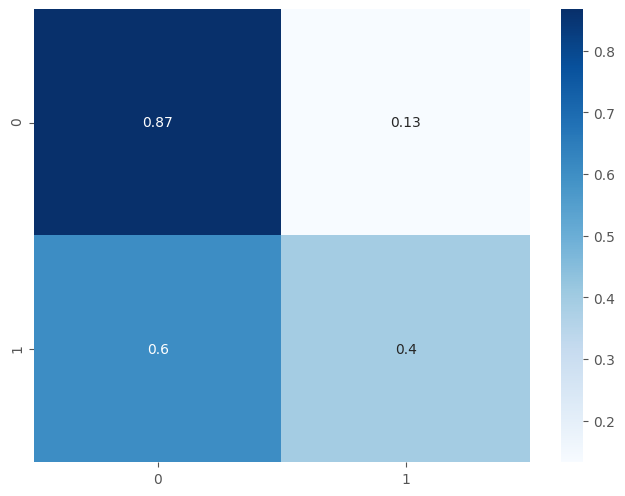

Sin normalizar con datos de entrenamiento


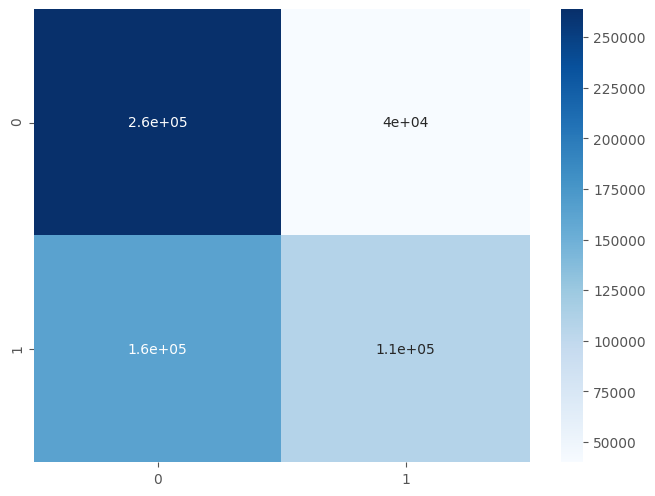

Normalizada con datos de entrenamiento


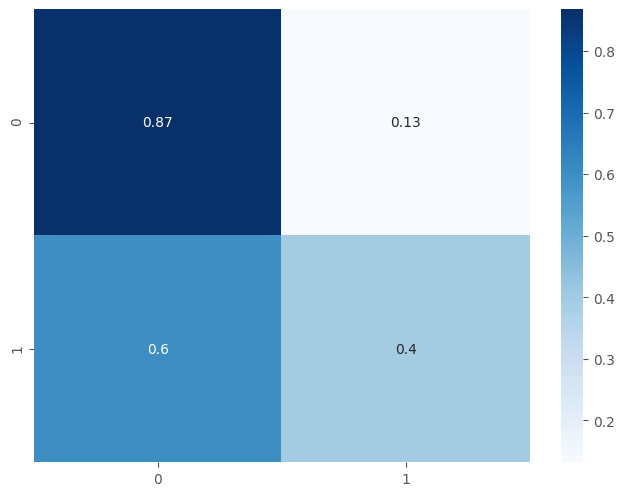

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


print('Sin normalizar con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_test,y_pred_test,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()


print('Sin normalizar con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_train,y_pred_train,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()

ROC datos de prueba


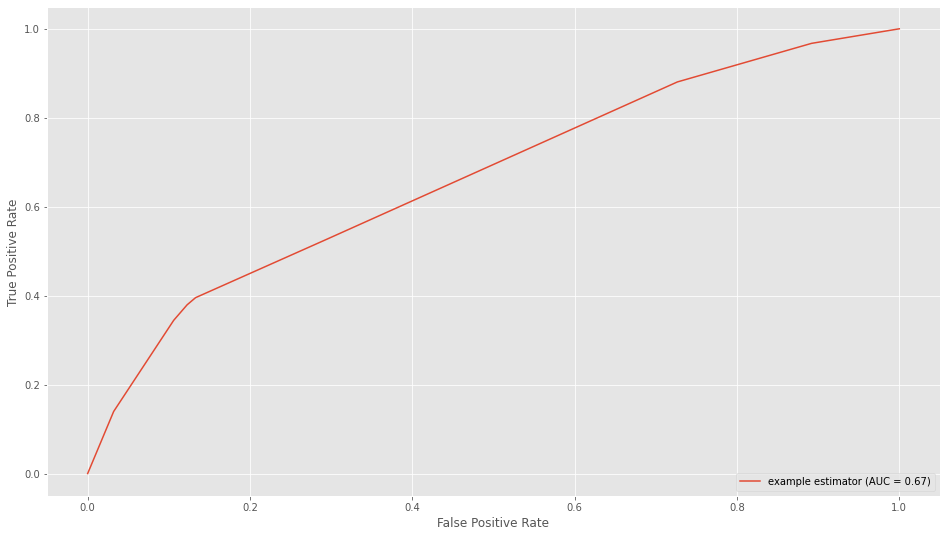

ROC datos de entrenamiento


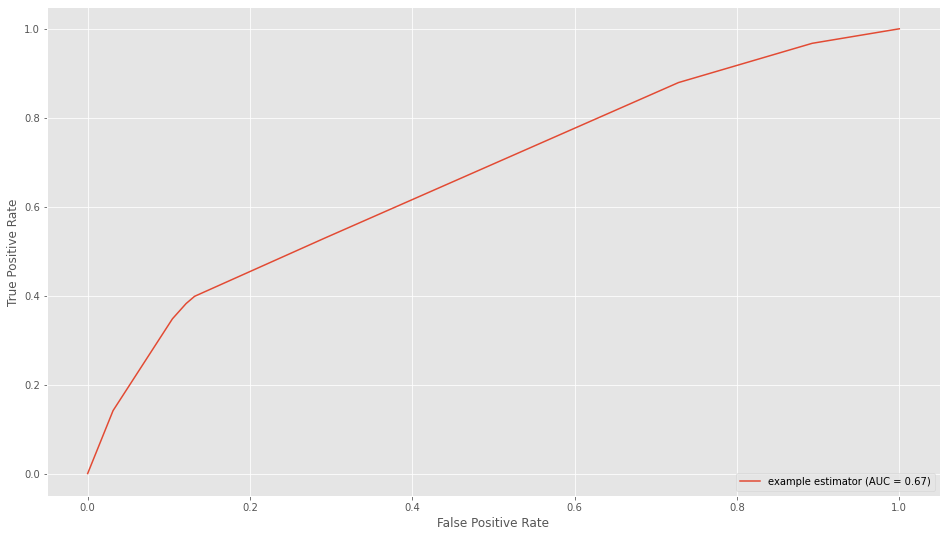

In [ ]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc

print('ROC datos de prueba')

y_score = tree_best.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()

print('ROC datos de entrenamiento')

y_score = tree_best.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()

# Reducción de dimensión

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()#instantiate
scaler.fit(X) # calcula la media y estandar para cada dimension
Xs=scaler.transform(X)# transforma los datos a su nueva escala

In [ ]:
pca=PCA(n_components=X.shape[1])
pca.fit(Xs)
X_pca=pca.transform(Xs) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (720856, 28)


In [ ]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:17]))

[0.11187426 0.10029085 0.06686407 0.05787414 0.05214664 0.04477437
 0.04014612 0.03668344 0.03586655 0.03528815 0.03470134 0.0320638
 0.0313597  0.03066393 0.02991257 0.02862974 0.0271661  0.0254392
 0.02424776 0.02375613 0.02240575 0.02235024 0.02072076 0.0180747
 0.01694844 0.01428434 0.01146676 0.00400014]
suma: 0.7963057699322408


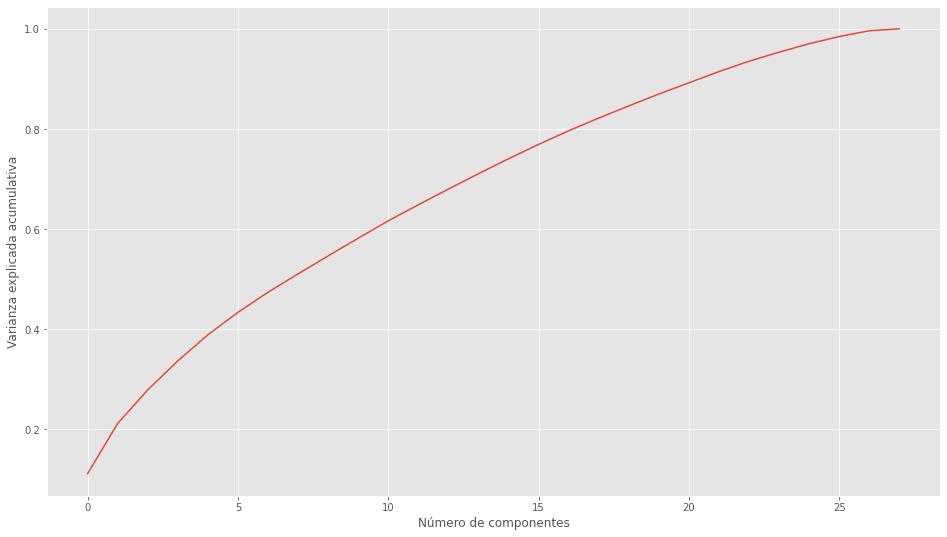

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
parameterspipe = {'treebest__criterion':('gini', 'entropy'), 'treebest__max_depth': np.linspace(3,100,1),'treebest__max_features':('auto', 'sqrt', 'log2')}


pipe = Pipeline([('scaler', scaler), ('pca',PCA(n_components=17)) ,('treebest', DecisionTreeClassifier())])
clfpipe = RandomizedSearchCV(pipe, parameterspipe)
clfpipe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=17,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('treebest',
                                              DecisionTreeClassifier(ccp_alpha=0.0,
            

In [ ]:
clfpipe.best_params_

{'treebest__criterion': 'entropy',
 'treebest__max_depth': 3.0,
 'treebest__max_features': 'sqrt'}

In [ ]:
treebestpipe = Pipeline([('scaler', scaler), ('pca',PCA(n_components=17)) ,('treebest', DecisionTreeClassifier(criterion='entropy',max_depth=3.0, max_features='auto', random_state=42))])
treebestpipe.fit(X_train,y_train)
exactitud_test=treebestpipe.score(X_test,y_test)
exactitud_train=treebestpipe.score(X_train,y_train)
print('exactitud datos entrenamiento:',exactitud_test,'exactitud datos de prueba',exactitud_train)


exactitud datos entrenamiento: 0.6293801847792914 exactitud datos de prueba 0.6290758890484217


In [ ]:

print('Test metrics')
y_pred_test=treebestpipe.predict(X_test)
print(classification_report(y_test, y_pred_test))
print('Train metrics')
y_pred_train=treebestpipe.predict(X_train)
print(classification_report(y_train, y_pred_train))

Test metrics
              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67     76307
         1.0       0.62      0.55      0.58     67865

    accuracy                           0.63    144172
   macro avg       0.63      0.63      0.62    144172
weighted avg       0.63      0.63      0.63    144172

Train metrics
              precision    recall  f1-score   support

         0.0       0.63      0.70      0.67    303802
         1.0       0.62      0.55      0.58    272882

    accuracy                           0.63    576684
   macro avg       0.63      0.63      0.62    576684
weighted avg       0.63      0.63      0.63    576684



Sin normalizar con datos de prueba


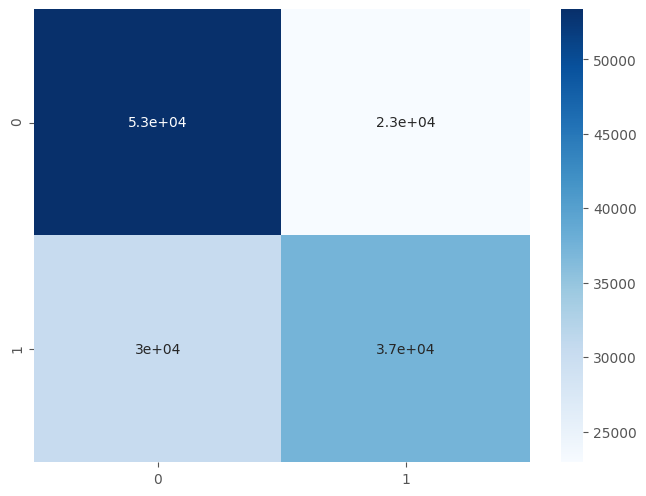

Normalizada con datos de prueba


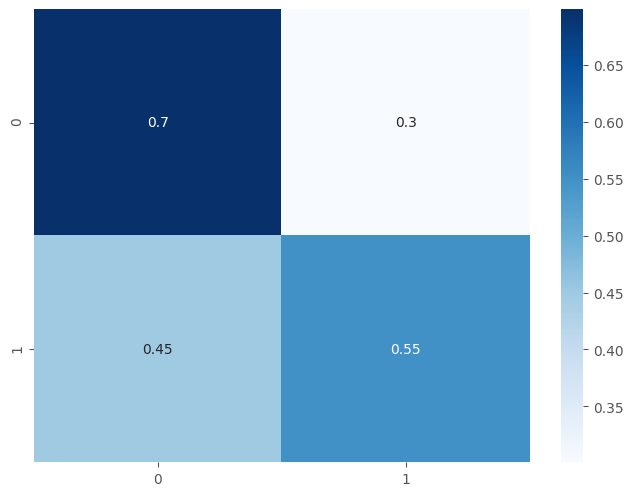

Sin normalizar con datos de entrenamiento


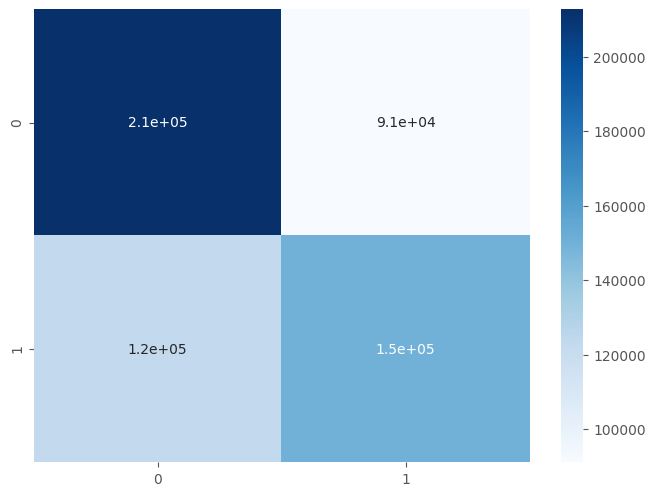

Normalizada con datos de entrenamiento


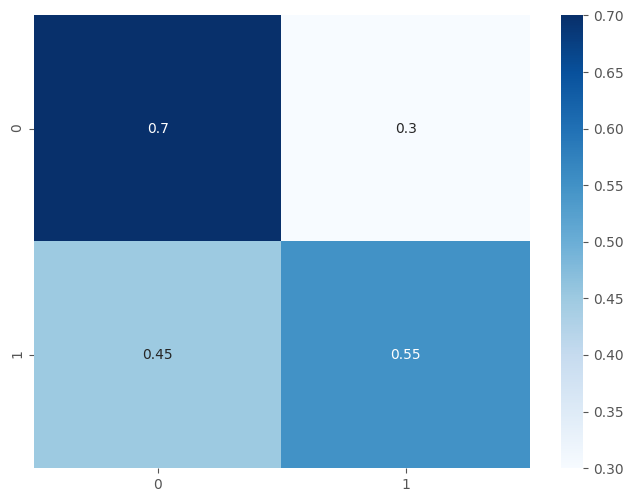

In [ ]:

print('Sin normalizar con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_test,y_pred_test,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()


print('Sin normalizar con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_train,y_pred_train,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()

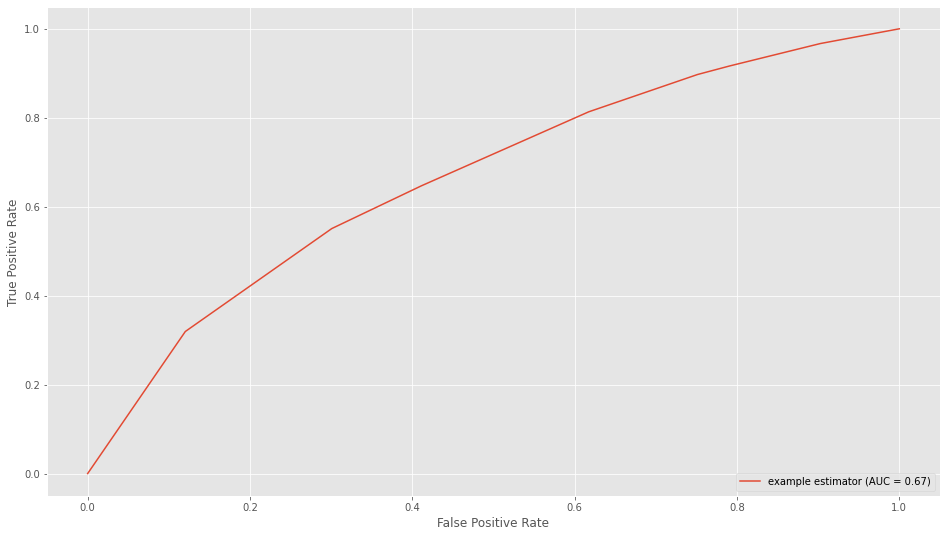

ROC datos de entrenamiento


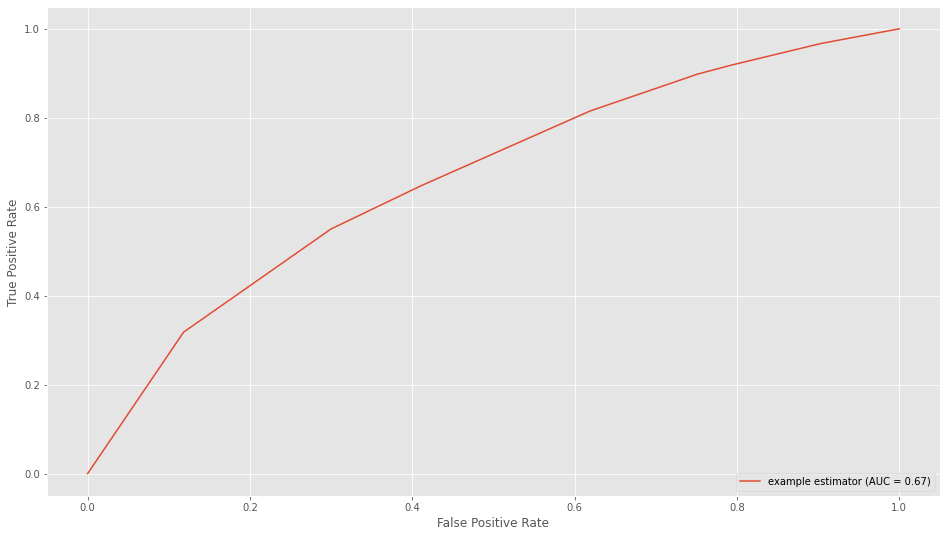

In [ ]:
y_score = treebestpipe.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()

print('ROC datos de entrenamiento')

y_score = treebestpipe.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

espacio_parametros = {
    'MLPC__hidden_layer_sizes': [(8,4,2,),(50,50,50), (50,100,50), (100,)],
    'MLPC__activation': ['logistic', 'relu'],
    'MLPC__solver': ['sgd', 'adam'],
    'MLPC__alpha': [0.0001, 0.05],
    'MLPC__max_iter':[100,200,500,1000],
    'MLPC__learning_rate': ['constant','adaptive'],
    'MLPC__learning_rate_init': np.logspace(-4,1)
}

In [ ]:
from sklearn.model_selection import GridSearchCV 
parameters = { 'MLPC__hidden_layer_sizes': [(100,),(100,10)], 'MLPC__max_iter':[500]}
pipeann = Pipeline([('scaler', scaler),('MLPC', MLPClassifier())])
clfpipeann = GridSearchCV(pipeann, parameterspipe)

clfpipeann = GridSearchCV(pipeann, parameters)
clfpipeann.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('MLPC',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learning_rate='constant',
         

In [ ]:
clfpipeann.best_params_

{'MLPC__hidden_layer_sizes': (100,), 'MLPC__max_iter': 500}

In [ ]:
parameters = { 'MLPC__hidden_layer_sizes': [(100,10)], 'MLPC__max_iter':[500]}
ann=Pipeline([('scaler', scaler),('MLPC', MLPClassifier())])
ann.fit(X_train,y_train)
exactitud_test=ann.score(X_test,y_test)
exactitud_train=ann.score(X_train,y_train)
print('exactitud datos entrenamiento:',exactitud_test,'exactitud datos de prueba',exactitud_train)

exactitud datos entrenamiento: 0.7041658574480482 exactitud datos de prueba 0.7107341282227355


In [ ]:
print('Test metrics')
y_pred_test=ann.predict(X_test)
print(classification_report(y_test, y_pred_test))
print('Train metrics')
y_pred_train=tree_best.predict(X_train)
print(classification_report(y_train, y_pred_train))

Test metrics
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74     76307
         1.0       0.71      0.62      0.66     67865

    accuracy                           0.70    144172
   macro avg       0.71      0.70      0.70    144172
weighted avg       0.71      0.70      0.70    144172

Train metrics
              precision    recall  f1-score   support

         0.0       0.62      0.87      0.72    303802
         1.0       0.73      0.40      0.52    272882

    accuracy                           0.65    576684
   macro avg       0.67      0.63      0.62    576684
weighted avg       0.67      0.65      0.62    576684



Sin normalizar con datos de prueba


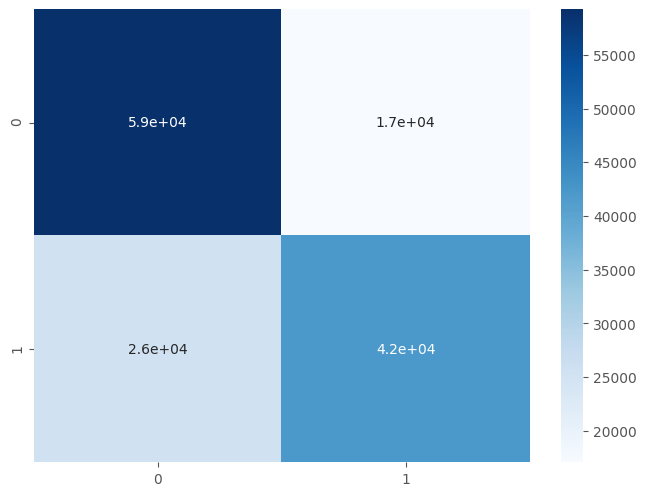

Normalizada con datos de prueba


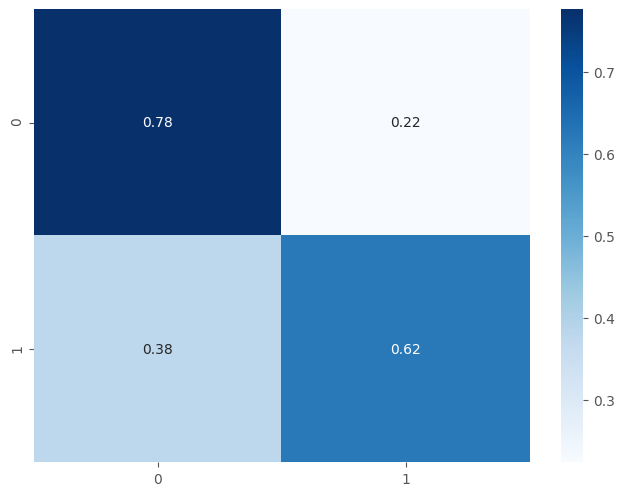

Sin normalizar con datos de entrenamiento


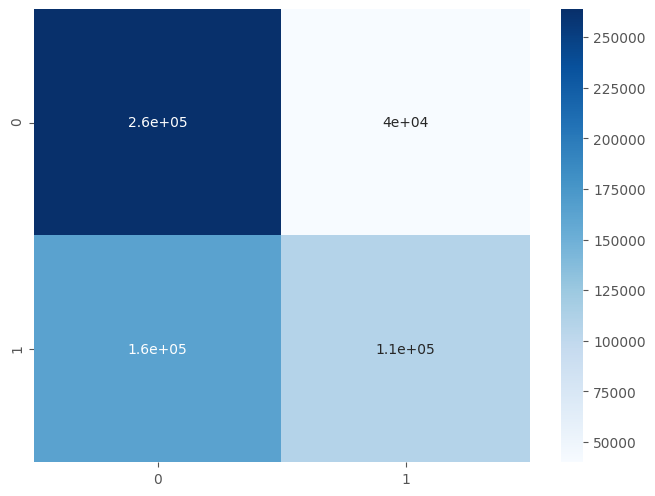

Normalizada con datos de entrenamiento


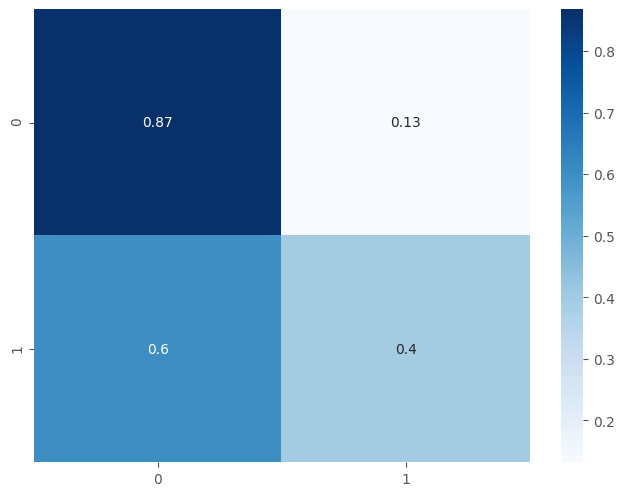

In [ ]:
print('Sin normalizar con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_test,y_pred_test,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()


print('Sin normalizar con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_train,y_pred_train,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()

ROC datos de prueba


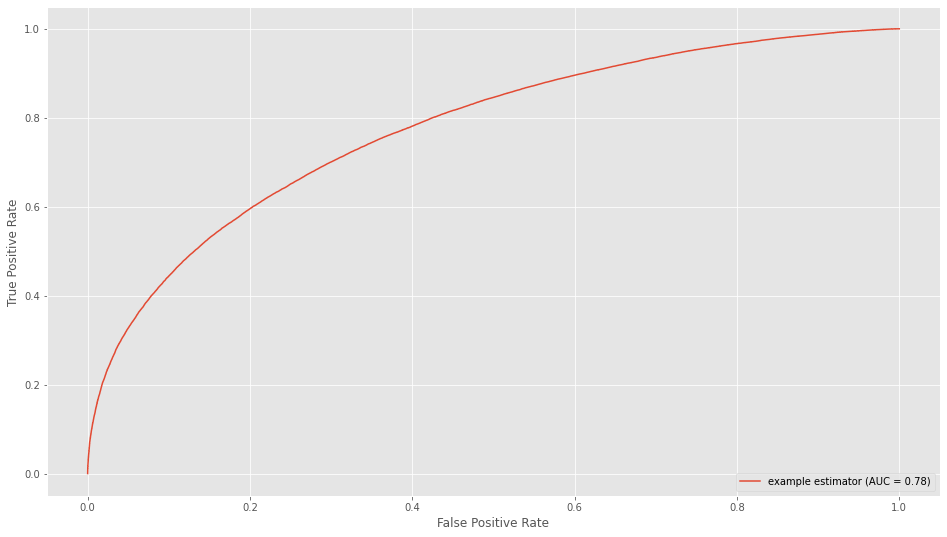

ROC datos de entrenamiento


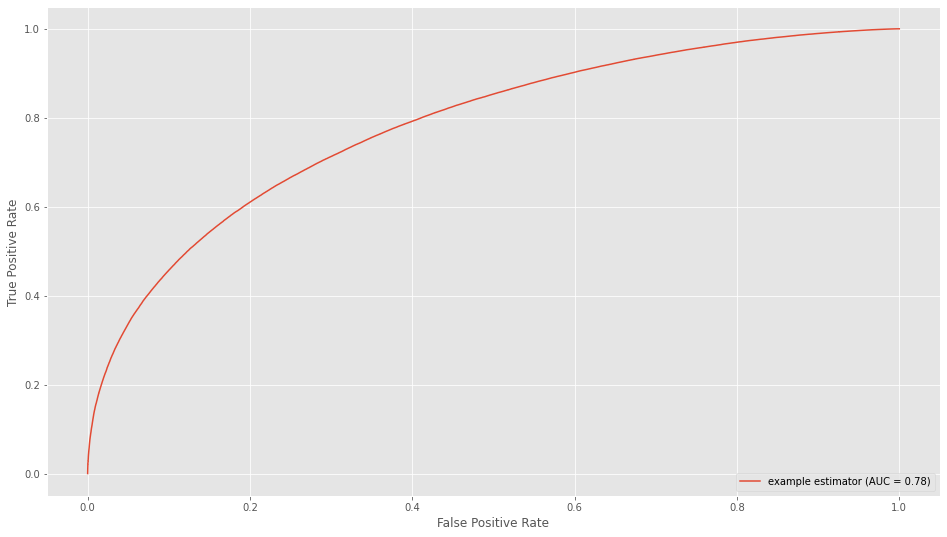

In [ ]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc

print('ROC datos de prueba')

y_score = ann.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()

print('ROC datos de entrenamiento')

y_score = ann.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()

# ANN con reducción de dimensión

In [ ]:
parameters = { 'MLPC__hidden_layer_sizes': [(100,10)], 'MLPC__max_iter':[500]}
ann=Pipeline([('scaler', scaler),('pca',PCA(n_components=17)),('MLPC', MLPClassifier())])
ann.fit(X_train,y_train)
exactitud_test=ann.score(X_test,y_test)
exactitud_train=ann.score(X_train,y_train)
print('exactitud datos entrenamiento:',exactitud_test,'exactitud datos de prueba',exactitud_train)

exactitud datos entrenamiento: 0.6934148100879505 exactitud datos de prueba 0.6986824673478023


In [ ]:
print('Test metrics')
y_pred_test=ann.predict(X_test)
print(classification_report(y_test, y_pred_test))
print('Train metrics')
y_pred_train=tree_best.predict(X_train)
print(classification_report(y_train, y_pred_train))

Test metrics
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73     76307
         1.0       0.70      0.61      0.65     67865

    accuracy                           0.69    144172
   macro avg       0.69      0.69      0.69    144172
weighted avg       0.69      0.69      0.69    144172

Train metrics
              precision    recall  f1-score   support

         0.0       0.62      0.87      0.72    303802
         1.0       0.73      0.40      0.52    272882

    accuracy                           0.65    576684
   macro avg       0.67      0.63      0.62    576684
weighted avg       0.67      0.65      0.62    576684



Sin normalizar con datos de prueba


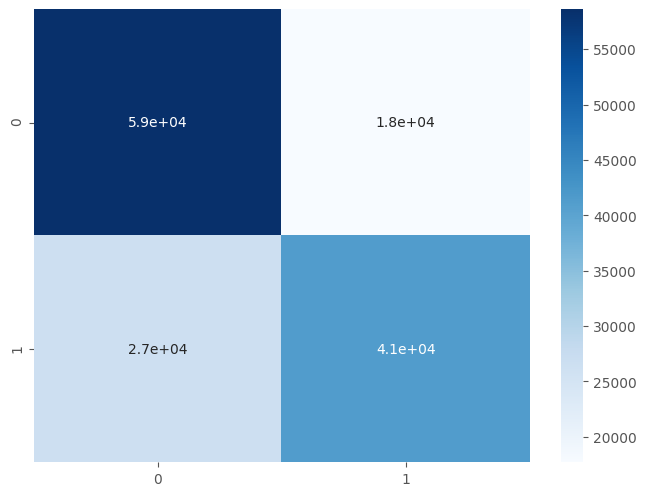

Normalizada con datos de prueba


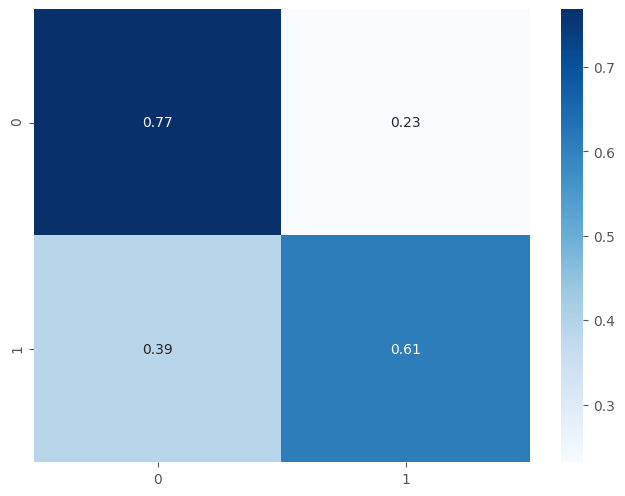

Sin normalizar con datos de entrenamiento


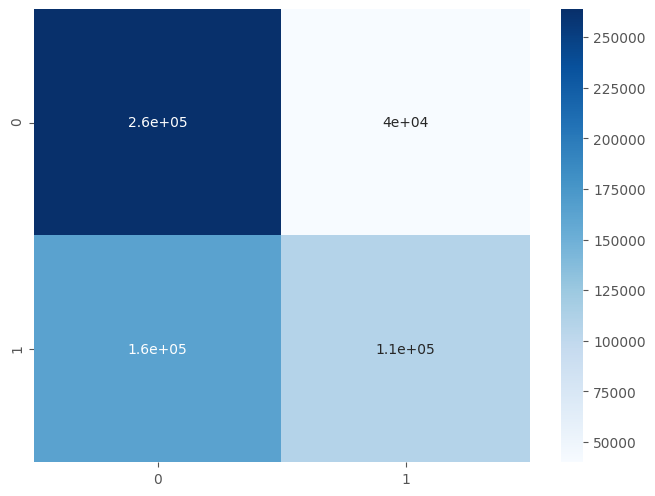

Normalizada con datos de entrenamiento


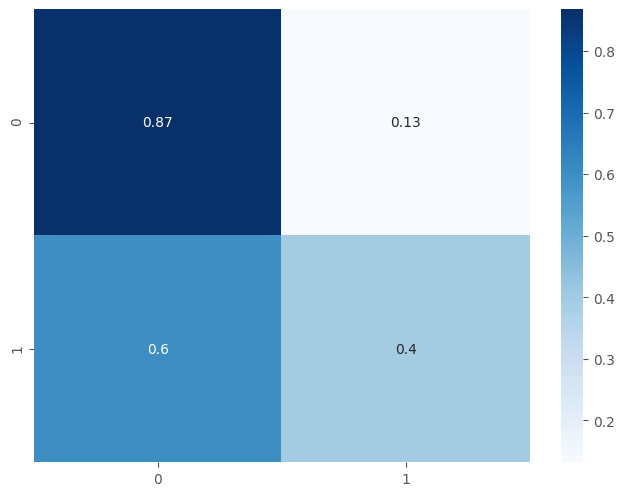

In [ ]:
print('Sin normalizar con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_test,y_pred_test,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()


print('Sin normalizar con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_train,y_pred_train,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()

ROC datos de prueba


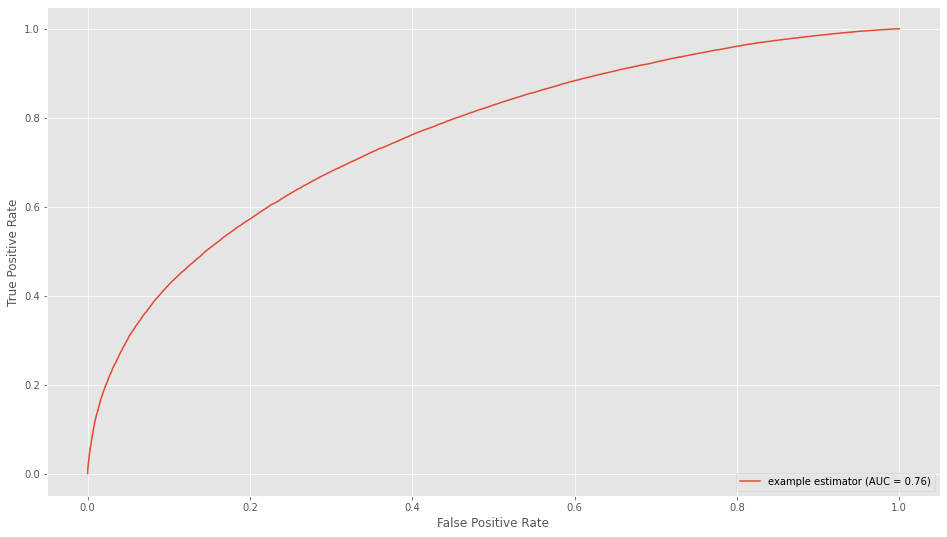

ROC datos de entrenamiento


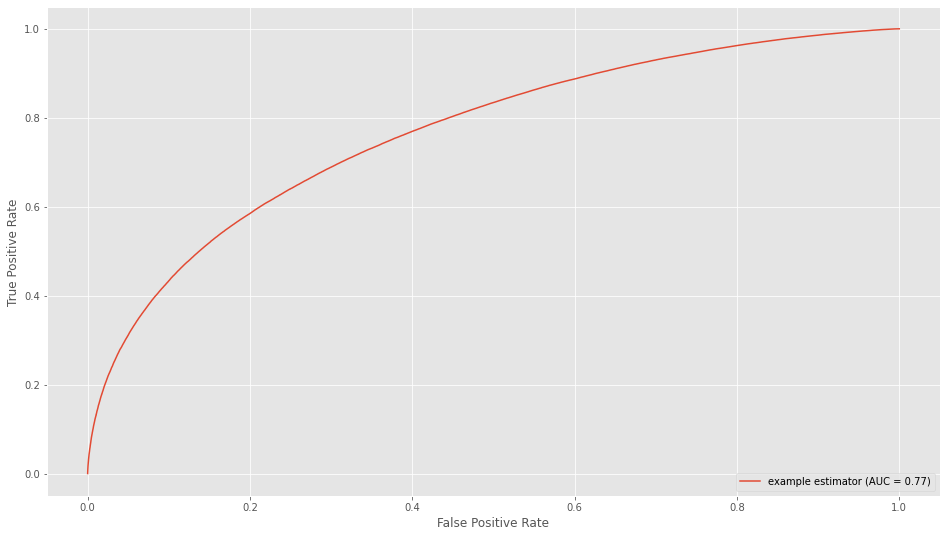

In [ ]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc

print('ROC datos de prueba')

y_score = ann.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()

print('ROC datos de entrenamiento')

y_score = ann.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()

In [ ]:
from sklearn.ensemble import  RandomForestClassifier


parameters = {'n_estimators':linspace(50,1000,10),'criterion':('gini', 'entropy'), 'max_depth': np.linspace(3,100,1),'max_features':('auto', 'sqrt', 'log2')}

In [ ]:
parameters = {'n_estimators':[100],'criterion':('gini', 'entropy'), 'max_depth': np.linspace(3,100,1),'max_features':('auto', 'sqrt', 'log2')}

In [ ]:
rfs=RandomForestClassifier()
clfrf = RandomizedSearchCV(rfs, parameters)
clfrf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
clfrf.best_params_

{'criterion': 'entropy',
 'max_depth': 3.0,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
rfbestpipe = RandomForestClassifier(criterion='entropy', max_depth=3.0, max_features='log2',n_estimators=100)
rfbestpipe.fit(X_train,y_train)
exactitud_test=rfbestpipe.score(X_test,y_test)
exactitud_train=rfbestpipe.score(X_train,y_train)
print('exactitud datos entrenamiento:',exactitud_test,'exactitud datos de prueba',exactitud_train)

exactitud datos entrenamiento: 0.6752212634908304 exactitud datos de prueba 0.6748791365808657


In [ ]:
print('Test metrics')
y_pred_test=rfbestpipe.predict(X_test)
print(classification_report(y_test, y_pred_test))
print('Train metrics')
y_pred_train=rfbestpipe.predict(X_train)
print(classification_report(y_train, y_pred_train))

Test metrics
              precision    recall  f1-score   support

         0.0       0.66      0.79      0.72     76307
         1.0       0.70      0.54      0.61     67865

    accuracy                           0.68    144172
   macro avg       0.68      0.67      0.67    144172
weighted avg       0.68      0.68      0.67    144172

Train metrics
              precision    recall  f1-score   support

         0.0       0.66      0.80      0.72    303802
         1.0       0.70      0.54      0.61    272882

    accuracy                           0.67    576684
   macro avg       0.68      0.67      0.67    576684
weighted avg       0.68      0.67      0.67    576684



Sin normalizar con datos de prueba


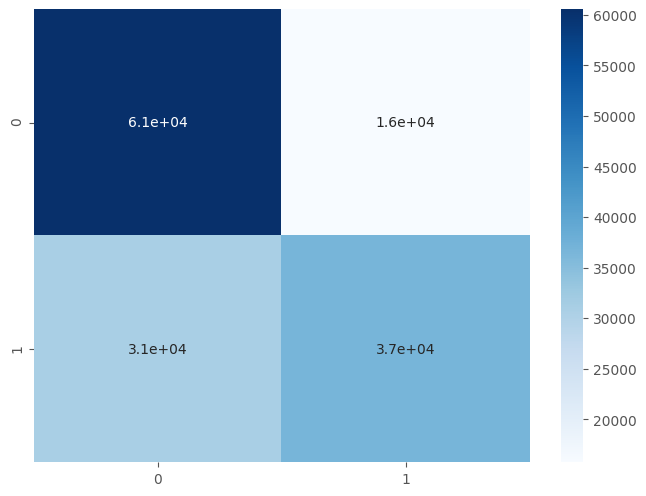

Normalizada con datos de prueba


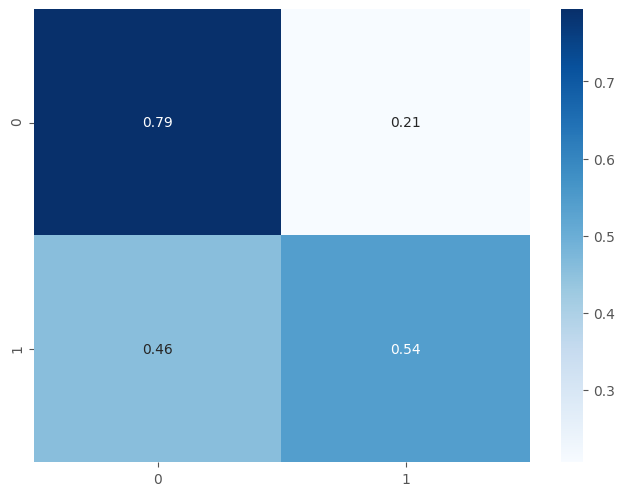

Sin normalizar con datos de entrenamiento


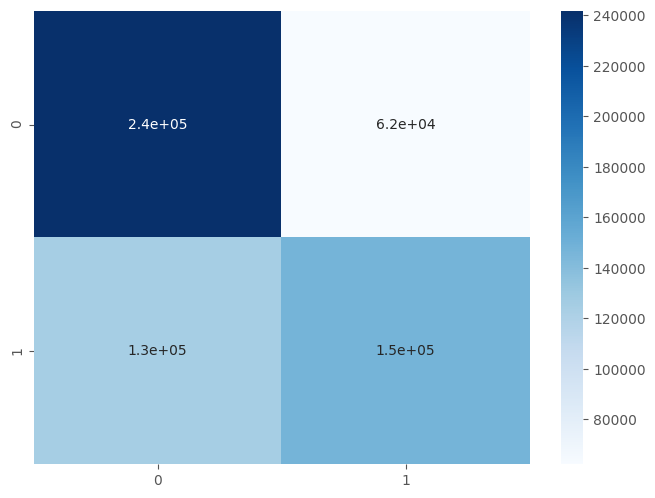

Normalizada con datos de entrenamiento


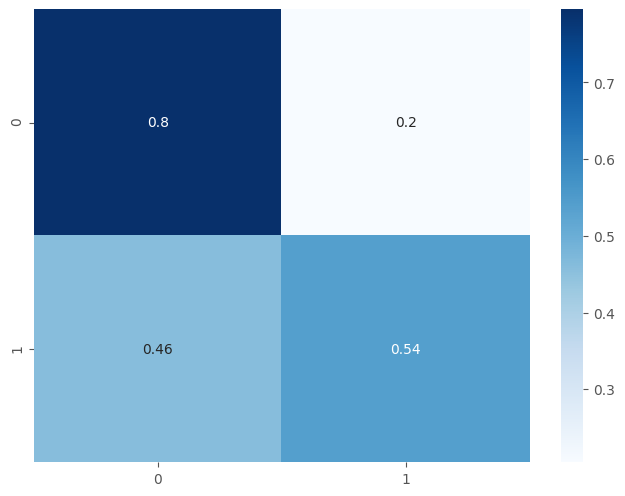

In [ ]:
print('Sin normalizar con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_test,y_pred_test,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()


print('Sin normalizar con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_train,y_pred_train,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()

ROC datos de prueba


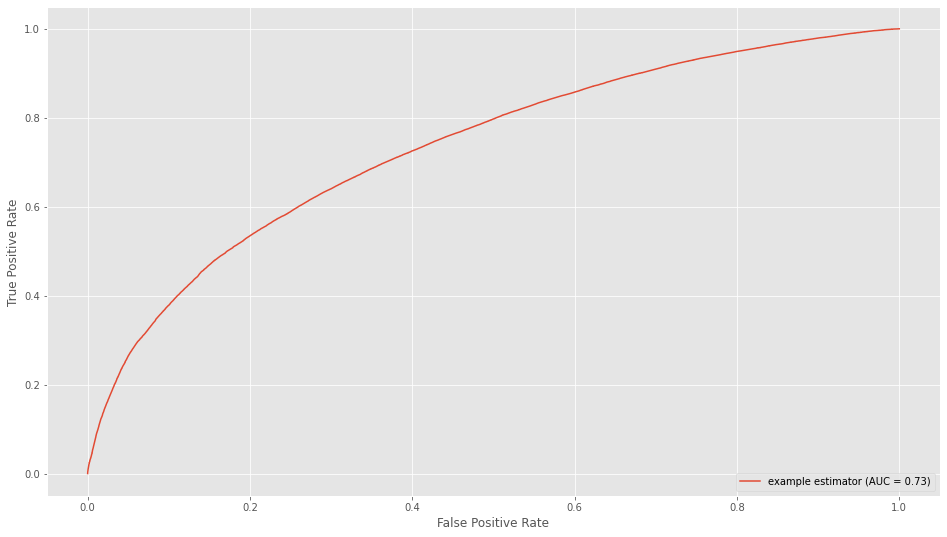

ROC datos de entrenamiento


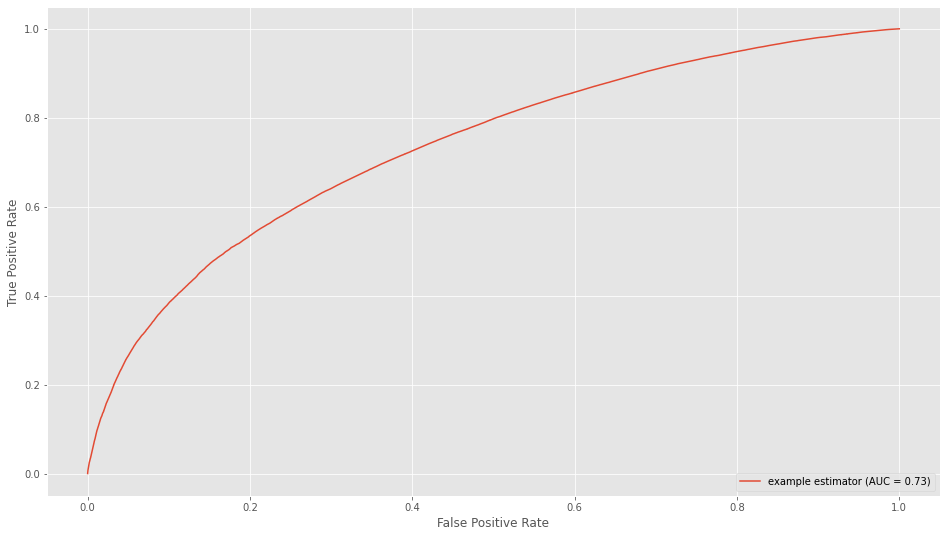

In [ ]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc

print('ROC datos de prueba')

y_score = rfbestpipe.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()

print('ROC datos de entrenamiento')

y_score = rfbestpipe.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()

In [ ]:
parameterspipe = {'rf__n_estimators':[100],'rf__criterion':('gini', 'entropy'), 'rf__max_depth': np.linspace(3,100,1),'rf__max_features':('auto', 'sqrt', 'log2')}

piperf = Pipeline([('scaler', scaler), ('pca',PCA(n_components=17)) ,('rf', RandomForestClassifier())])
clfrfpipe = RandomizedSearchCV(piperf, parameterspipe)
clfrfpipe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=17,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('rf',
                                              RandomForestClassifier(bootstrap=True,
                 

In [ ]:
clfrfpipe.best_params_

{'rf__criterion': 'entropy',
 'rf__max_depth': 3.0,
 'rf__max_features': 'auto',
 'rf__n_estimators': 100}

In [ ]:
piperfc=Pipeline([('scaler', scaler), ('pca',PCA(n_components=17)) ,('rf', RandomForestClassifier(criterion='entropy',max_depth=3.0, max_features='auto',n_estimators=100))])
piperfc.fit(X_train,y_train)
exactitud_test=piperfc.score(X_test,y_test)
exactitud_train=piperfc.score(X_train,y_train)
print('exactitud datos entrenamiento:',exactitud_test,'exactitud datos de prueba',exactitud_train)

exactitud datos entrenamiento: 0.6482812196543019 exactitud datos de prueba 0.6485718348350223


In [ ]:
print('Test metrics')
y_pred_test=piperfc.predict(X_test)
print(classification_report(y_test, y_pred_test))
print('Train metrics')
y_pred_train=piperfc.predict(X_train)
print(classification_report(y_train, y_pred_train))

Test metrics
              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69     76307
         1.0       0.65      0.54      0.59     67865

    accuracy                           0.65    144172
   macro avg       0.65      0.64      0.64    144172
weighted avg       0.65      0.65      0.64    144172

Train metrics
              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69    303802
         1.0       0.66      0.54      0.59    272882

    accuracy                           0.65    576684
   macro avg       0.65      0.64      0.64    576684
weighted avg       0.65      0.65      0.64    576684



Sin normalizar con datos de prueba


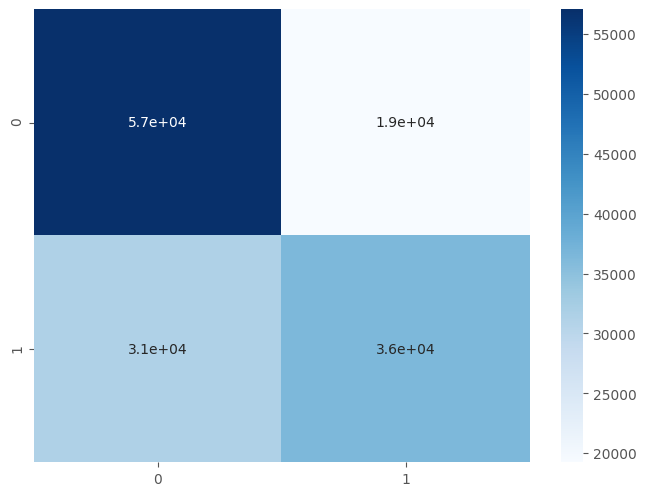

Normalizada con datos de prueba


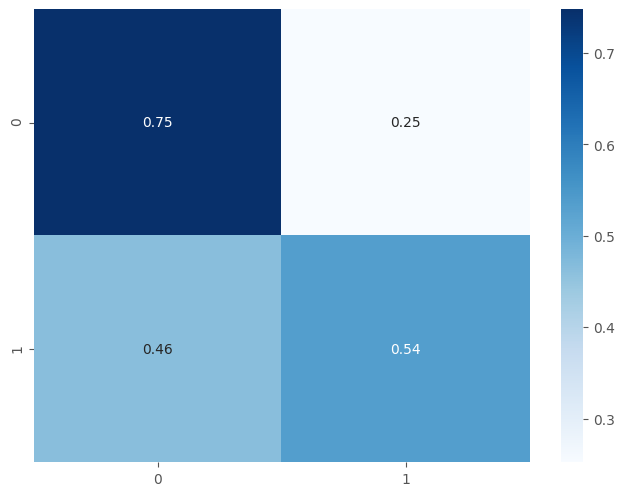

Sin normalizar con datos de entrenamiento


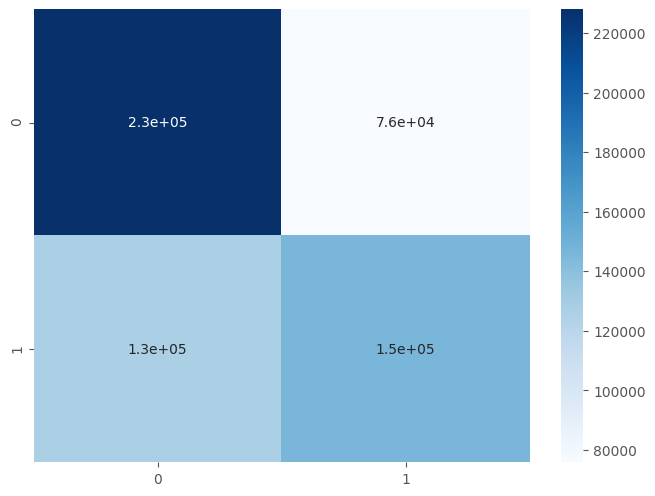

Normalizada con datos de entrenamiento


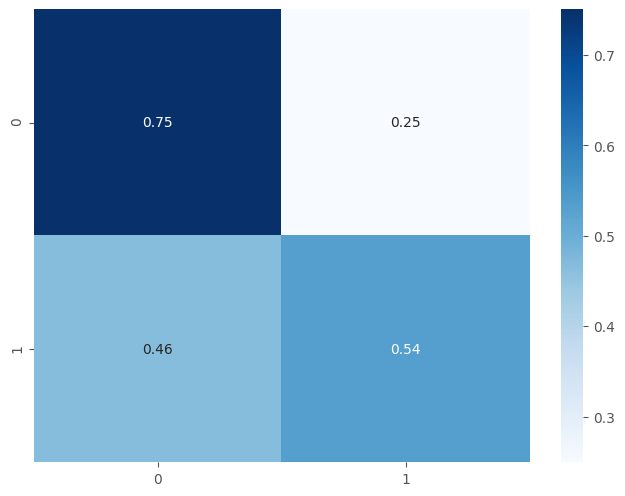

In [ ]:
print('Sin normalizar con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de prueba')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_test,y_pred_test,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()


print('Sin normalizar con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

print('Normalizada con datos de entrenamiento')
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
cmn=confusion_matrix(y_train,y_pred_train,normalize='true')
sns.heatmap(cmn, annot=True,cmap='Blues')
plt.show()

ROC datos de prueba


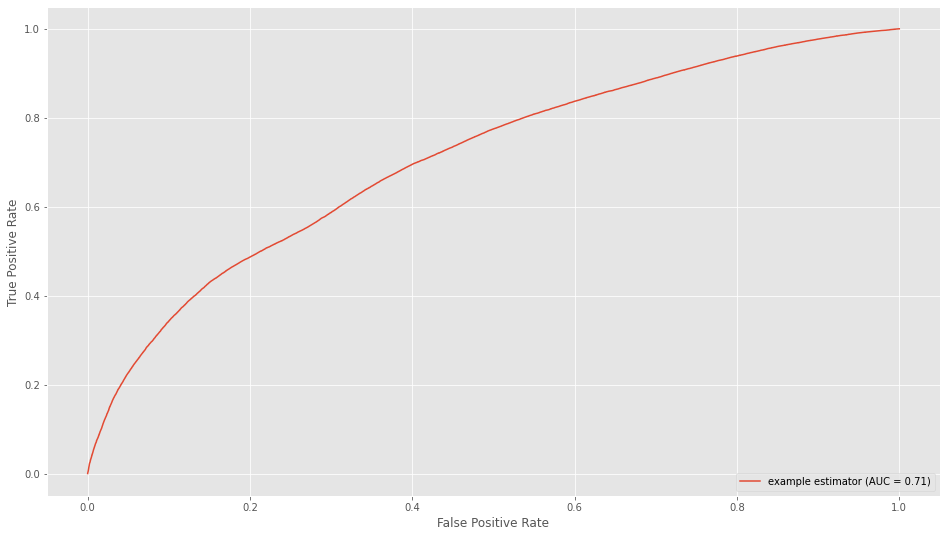

ROC datos de entrenamiento


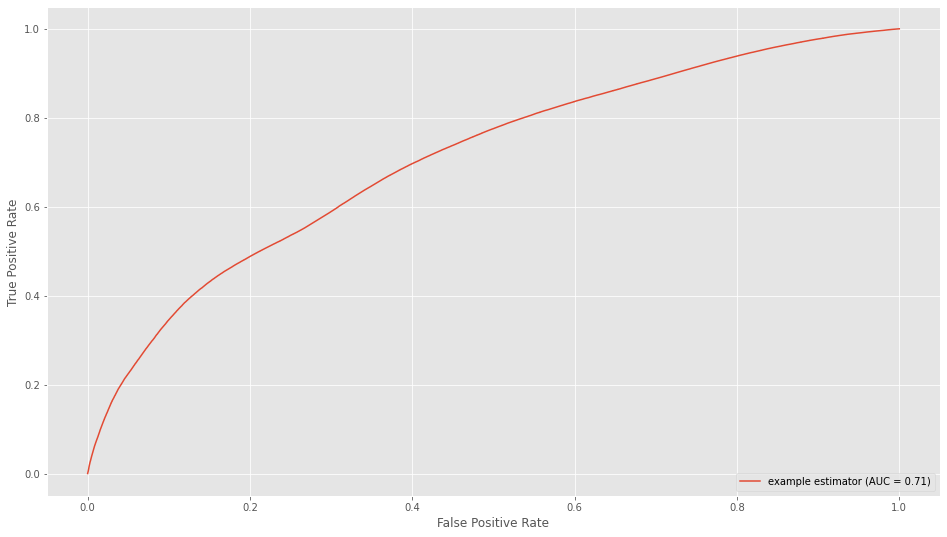

In [ ]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc

print('ROC datos de prueba')

y_score = piperfc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()

print('ROC datos de entrenamiento')

y_score = piperfc.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()